# Assignmnet 2 (100 points)

**Name:** Fatih Özkan <br>
**Email:** fao8402@thi.de <br>
**Group:** B <br>
**Hours spend *(optional)* :** <br>

### SMS Spam Detection *(100 points)*

<p>You are hired as an AI expert in the development department of a telecommunications company. The first thing on your orientation plan is a small project that your boss has assigned you for the following given situation. Your supervisor has given away his private cell phone number on too many websites and is now complaining about daily spam SMS. Therefore, it is your job to write a spam detector in Python. </p>

<p>In doing so, you need to use a Naive Bayes classifier that can handle both bag-of-words (BoW) and tf-idf features as input. For the evaluation of your spam detector, an SMS collection is available as a dataset - this has yet to be suitably split into train and test data. To keep the costs as low as possible and to avoid problems with copyrights, your boss insists on a new development with Python.</p>

<p>Include a short description of the data preprocessing steps, method, experiment design, hyper-parameters, and evaluation metric. Also, document your findings, drawbacks, and potential improvements.</p>

<p>Note: You need to implement the bag-of-words (BoW) and tf-idf feature extractor from scratch. You can use existing python libraries for other tasks.</p>

**Dataset and Resources**

* SMS Spam Collection Dataset: https://archive.ics.uci.edu/dataset/228/sms+spam+collection

**Data Preprocessing**

<p>Load Data: Read the SMS data from the file.<p>
<p>Label Encoding: Convert the labels ("ham" and "spam") into numerical format.<p>
<p>Text Cleaning: Remove any special characters, numbers, and extra spaces. Convert text to lowercase.<p>

In [128]:
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
from collections import defaultdict
import math

# Load data
file_path = 'sms_spam_collection/SMSSpamCollection'
data = pd.read_csv(file_path, sep='\t', header=None, names=['label', 'message'])

# Encode labels
data['label'] = data['label'].map({'ham': 0, 'spam': 1})

print(data.head())

   label                                            message
0      0  Go until jurong point, crazy.. Available only ...
1      0                      Ok lar... Joking wif u oni...
2      1  Free entry in 2 a wkly comp to win FA Cup fina...
3      0  U dun say so early hor... U c already then say...
4      0  Nah I don't think he goes to usf, he lives aro...


In [129]:
# Text cleaning
def preprocess_text(text):
    text = text.lower()  # Lowercase
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = re.sub(r'\W', ' ', text)  # Remove special characters
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
    return text

data['message'] = data['message'].apply(preprocess_text)

print(data.head())
print(data.shape)

   label                                            message
0      0  go until jurong point crazy available only in ...
1      0                            ok lar joking wif u oni
2      1  free entry in a wkly comp to win fa cup final ...
3      0        u dun say so early hor u c already then say
4      0  nah i don t think he goes to usf he lives arou...
(5572, 2)


In [130]:
# Split data %80 train and %20 test
X_train, X_test, y_train, y_test = train_test_split(data['message'], data['label'], test_size=0.2, random_state=42)

**Feature Extraction**


<p>Bag-of-Words (BoW):<p>

Create a vocabulary of all unique words in the training data.
Represent each message as a vector of word counts.



In [131]:
# Bag-of-Words feature extraction
def build_bow(corpus): # Build the vocabulary
    vocab = defaultdict(int) # Default dictionary to store the word frequency
    for message in corpus:
        for word in message.split():
            vocab[word] += 1
    return vocab

def transform_bow(corpus, vocab): # Transform the corpus into a matrix
    features = []
    for message in corpus:
        message_features = [0] * len(vocab) # Initialize array with zeros
        for word in message.split():  # For each word in the message
            if word in vocab: 
                message_features[vocab[word]] += 1 # if the word in vocab Increment word count
        features.append(message_features) # Append the message feature to the features list
    return np.array(features) 


# Build vocabulary
vocab = build_bow(X_train)
vocab = {word: idx for idx, (word, _) in enumerate(vocab.items())}
print(vocab)

# Transform data
X_train_bow = transform_bow(X_train, vocab)
X_test_bow = transform_bow(X_test, vocab)
print(X_train_bow.shape, X_test_bow.shape)

{'reply': 0, 'to': 1, 'win': 2, 'weekly': 3, 'where': 4, 'will': 5, 'the': 6, 'fifa': 7, 'world': 8, 'cup': 9, 'be': 10, 'held': 11, 'send': 12, 'stop': 13, 'end': 14, 'service': 15, 'hello': 16, 'sort': 17, 'of': 18, 'out': 19, 'in': 20, 'town': 21, 'already': 22, 'that': 23, 'so': 24, 'dont': 25, 'rush': 26, 'home': 27, 'i': 28, 'am': 29, 'eating': 30, 'nachos': 31, 'let': 32, 'you': 33, 'know': 34, 'eta': 35, 'how': 36, 'come': 37, 'guoyang': 38, 'go': 39, 'n': 40, 'tell': 41, 'her': 42, 'then': 43, 'u': 44, 'told': 45, 'hey': 46, 'sathya': 47, 'till': 48, 'now': 49, 'we': 50, 'dint': 51, 'meet': 52, 'not': 53, 'even': 54, 'a': 55, 'single': 56, 'time': 57, 'can': 58, 'saw': 59, 'situation': 60, 'orange': 61, 'brings': 62, 'ringtones': 63, 'from': 64, 'all': 65, 'chart': 66, 'heroes': 67, 'with': 68, 'free': 69, 'hit': 70, 'each': 71, 'week': 72, 'pics': 73, 'on': 74, 'wap': 75, 'receiving': 76, 'these': 77, 'tips': 78, 'sitting': 79, 'mu': 80, 'waiting': 81, 'for': 82, 'everyone': 

<p>TF-IDF:

Calculate Term Frequency (TF) and Inverse Document Frequency (IDF).
Represent each message as a vector of TF-IDF scores.

In [132]:
# TF-IDF feature extraction
def compute_tf_idf(corpus): # Compute the TF-IDF

    """ 
    we will use the formula:
    TF-IDF = (term frequency) * log(N / document frequency)
    where:
    term frequency = (number of times term t appears in a document) / (total number of terms in the document)
    document frequency = number of documents containing the term t
    N = total number of documents

    """
    tf = defaultdict(lambda: defaultdict(int)) # Term frequency dictionary
    df = defaultdict(int) # Document frequency dictionary

    for message in corpus:  
        words = message.split()  # Split the message into words
        for word in words: # For each word in the message
            tf[message][word] += 1  # Increment the word count term frequency
        for word in set(words): # For each unique word in the message (set:no duplciates)
            df[word] += 1 # Increment the document frequency unique word count
    
    N = len(corpus) # Number of documents
    tf_idf = {} # TF-IDF values
    
    # Compute the TF-IDF values
    for message in corpus: # For each message in the corpus
        tf_idf[message] = {} # Initialize the TF-IDF dictionary
        for word, count in tf[message].items(): 
            tf_idf[message][word] = (count / len(message.split())) * math.log(N / df[word]) #formula for TF-IDF 
    return tf_idf

def transform_tf_idf(corpus, tf_idf): # Transform the corpus into a matrix
    features = [] # Initialize the features list
    for message in corpus: 
        message_features = [0] * len(vocab) # Initialize the message feature array with zeros
        for word in message.split(): 
            if word in vocab and word in tf_idf[message]: # If the word is in the vocabulary and the TF-IDF dictionary
                message_features[vocab[word]] = tf_idf[message][word] # Set the TF-IDF value
        features.append(message_features) # Append the message feature to the features list
    return np.array(features)

# Compute TF-IDF
tf_idf_train = compute_tf_idf(X_train)
tf_idf_test = compute_tf_idf(X_test)

# Transform data
X_train_tfidf = transform_tf_idf(X_train, compute_tf_idf(X_train))
X_test_tfidf = transform_tf_idf(X_test, compute_tf_idf(X_test))

print(X_train_tfidf.shape, X_test_tfidf.shape)

(4457, 6957) (1115, 6957)


In [133]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# Train and evaluate model
def train_and_evaluate(X_train, X_test, y_train, y_test):
    model = MultinomialNB() #Bayesian model bayes classifier
    model.fit(X_train, y_train) 
    y_pred = model.predict(X_test) 
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    return accuracy, precision, recall, f1


# Evaluate BoW features
accuracy_bow, precision_bow, recall_bow, f1_bow = train_and_evaluate(X_train_bow, X_test_bow, y_train, y_test)
print("Bag-of-Words - Accuracy:", accuracy_bow, "Precision:", precision_bow, "Recall:", recall_bow, "F1-Score:", f1_bow)

# Evaluate TF-IDF features
accuracy_tfidf, precision_tfidf, recall_tfidf, f1_tfidf = train_and_evaluate(X_train_tfidf, X_test_tfidf, y_train, y_test)
print("TF-IDF - Accuracy:", accuracy_tfidf, "Precision:", precision_tfidf, "Recall:", recall_tfidf, "F1-Score:", f1_tfidf)

# plot it on table
import matplotlib.pyplot as plt

labels = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
bow_scores = [accuracy_bow, precision_bow, recall_bow, f1_bow]
tfidf_scores = [accuracy_tfidf, precision_tfidf, recall_tfidf, f1_tfidf]





Bag-of-Words - Accuracy: 0.9919282511210762 Precision: 0.9861111111111112 Recall: 0.9530201342281879 F1-Score: 0.969283276450512
TF-IDF - Accuracy: 0.97847533632287 Precision: 0.9921259842519685 Recall: 0.8456375838926175 F1-Score: 0.9130434782608696


In [134]:
#Confusion matrix
from sklearn.metrics import confusion_matrix
model = MultinomialNB()
model.fit(X_train_bow, y_train)
y_pred = model.predict(X_test_bow)
confusion_matrix(y_test, y_pred)


array([[964,   2],
       [  7, 142]])

In [135]:
# Confusion matrix for TF-IDF
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)
y_pred = model.predict(X_test_tfidf)
confusion_matrix(y_test, y_pred)

array([[965,   1],
       [ 23, 126]])

***Potential Improvements:***

<p>We can use more advanced preprocessing techniques (e.g., stemming, lemmatization).

<p>We can experiment with different classifiers and hyperparameters.

<p>We can use word embeddings for better performance.


<p>Bag-of-Words (BoW) performs better overall, with higher accuracy, recall, and F1-Score compared to TF-IDF. This suggests that BoW is more effective at identifying spam messages without missing too many (high recall) and has a good balance between precision and recall (high F1-Score).

<p>TF-IDF has a higher precision, meaning it makes fewer false positive errors. False Postivie is important i think because no wants to miss important mails because of false positive spam detection. But it has a lower recall, indicating it misses more actual spam messages compared to BoW.

### Additional Experiments *(5 additional points - <span style="color: red;">Optional</span>)*

In [136]:
#results in tabular format
# Define the evaluation results
results = {
    'Feature Set': ['Bag-of-Words', 'TF-IDF'],
    'Accuracy': [accuracy_bow, accuracy_tfidf],
    'Precision': [precision_bow, precision_tfidf],
    'Recall': [recall_bow, recall_tfidf],
    'F1-Score': [f1_bow, f1_tfidf]
}

# Create a DataFrame
results_df = pd.DataFrame(results)

# Print the DataFrame
print(results_df)


    Feature Set  Accuracy  Precision    Recall  F1-Score
0  Bag-of-Words  0.991928   0.986111  0.953020  0.969283
1        TF-IDF  0.978475   0.992126  0.845638  0.913043


/var/folders/n2/v7krv3hd7f9_j02wpl4_74000000gn/T/ipykernel_38283/866948596.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['', 'Ham', 'Spam'], fontsize=12)
/var/folders/n2/v7krv3hd7f9_j02wpl4_74000000gn/T/ipykernel_38283/866948596.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['', 'Ham', 'Spam'], fontsize=12)


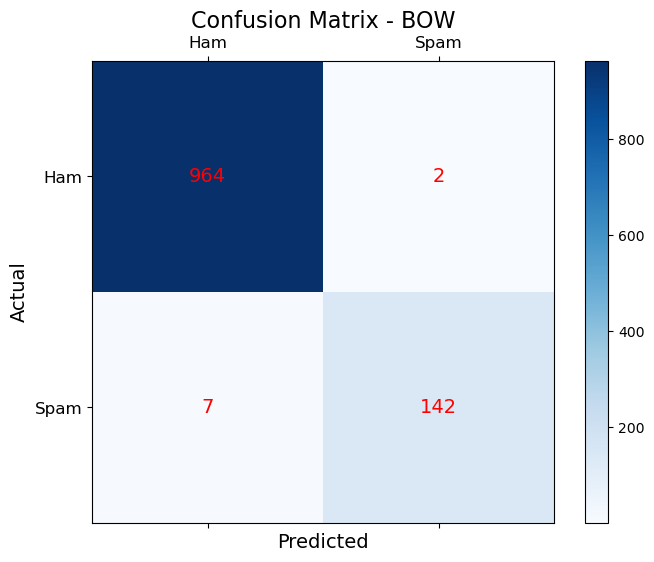

In [137]:
import matplotlib.pyplot as plt
import numpy as np

model.fit(X_train_bow, y_train)
y_pred = model.predict(X_test_bow)
# The confusion matrix array from the model
cm = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
fig, ax = plt.subplots(figsize=(8, 6))
cax = ax.matshow(cm, cmap=plt.cm.Blues)
plt.colorbar(cax)

# Adding labels
for (i, j), value in np.ndenumerate(cm):
    ax.text(j, i, f'{value}', ha='center', va='center', color='red', fontsize=14)

ax.set_xticklabels(['', 'Ham', 'Spam'], fontsize=12)
ax.set_yticklabels(['', 'Ham', 'Spam'], fontsize=12)
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.title('Confusion Matrix - BOW', fontsize=16)
plt.show()

/var/folders/n2/v7krv3hd7f9_j02wpl4_74000000gn/T/ipykernel_38283/2856029780.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['', 'Ham', 'Spam'], fontsize=12)
/var/folders/n2/v7krv3hd7f9_j02wpl4_74000000gn/T/ipykernel_38283/2856029780.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['', 'Ham', 'Spam'], fontsize=12)


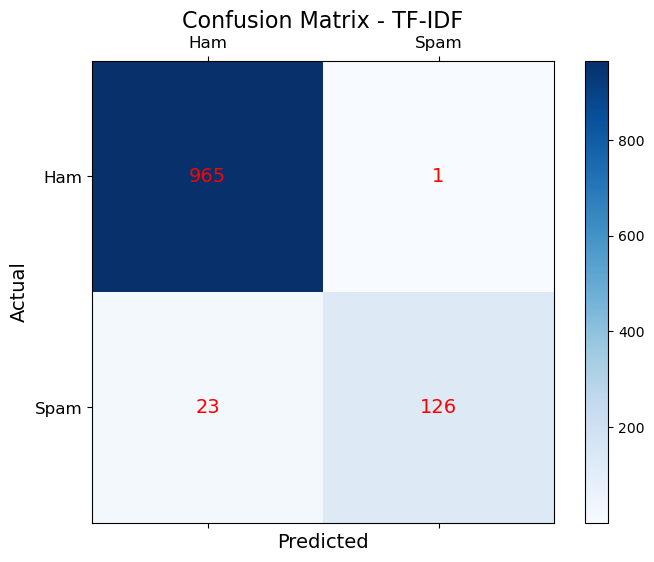

In [138]:
# Plotting the confusion matrix for TF-IDF

model.fit(X_train_tfidf, y_train)
y_pred = model.predict(X_test_tfidf)

cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(8, 6))
cax = ax.matshow(cm, cmap=plt.cm.Blues)
plt.colorbar(cax)

for (i, j), value in np.ndenumerate(cm):
    ax.text(j, i, f'{value}', ha='center', va='center', color='red', fontsize=14)

ax.set_xticklabels(['', 'Ham', 'Spam'], fontsize=12)
ax.set_yticklabels(['', 'Ham', 'Spam'], fontsize=12)
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.title('Confusion Matrix - TF-IDF', fontsize=16)

plt.show()